# Data Processing notebook.
#### We are here aiming to manipulate the data that we generated before.
#### It will be separated in 6 steps:
1. Data cleaning
2. Provide a list of the 15 most common words
3. Provide a list of the 2 pairs of words having the highest co-occurrence frequency
4. Build a graphical representation of the most frequent words with their polarity (pos/neg or anger/joy/fear/...)
5. Indicate the 3 most frequent representatives words in each category
6. Compare the results of the two approaches

# 1. Data Cleaning
#### Here, we will clean the dataset in order to analyze it

First things first, let's import the csv file

In [206]:
tweets = read.csv("data/debat_primaire_20000.csv")

In [207]:
dim(tweets)

[1] 20000    17

So our data frame contains 17 columns and 20 000 rows, let's see the 10 firsts rows

In [208]:
head(tweets, n = 10)

X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
1,Ce fut un débat intéressnt ! Ccl :Il y'a encore de l'espoir!N'oublions pas qu'un bon président est un président engagé ! #PrimaireLeDebat,FALSE,0,NA,2017-01-19 22:50:06,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OuAtas,0,FALSE,FALSE,NA,NA
2,C'est bon @GoogleFR @TwitterFrance avez vous bien collectés mes données ? Bonne nuit #numerique #bigdata #PrimaireLeDébat,FALSE,0,NA,2017-01-19 22:50:06,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WajdiHA2,0,FALSE,FALSE,NA,NA
3,"RT @DeLuca_Patrice: .@manuelvalls ""Je veux incarner l'espérance, venez voter dimanche!"" #AvecValls #PrimaireLeDebat",FALSE,0,NA,2017-01-19 22:50:06,FALSE,NA,8.222146e+17,NA,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for Windows</a>",ProvenceValls,5,TRUE,FALSE,NA,NA
4,"RT @DeLuca_Patrice: .@manuelvalls ""Nous avons besoin d'une Europe forte et unie"" #AvecValls #PrimaireLeDebat #Valls2017",FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Jojo29_BZH,10,TRUE,FALSE,NA,NA
5,RT @LPF_Paris18: #PrimaireLeDebat Dis donc @manuelvalls c'est à coup de #decheancedenationalite et de #49Al3 que tu penses nous sauver? #Mo…,FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FranceCredible,6,TRUE,FALSE,NA,NA
6,"""J'ai un progrès précis, crédible, de gauche"", a dit @Vincent_Peillon dans sa conclusion https://t.co/Zs9UHNLcNb… https://t.co/mBtiNvJIAb",FALSE,0,NA,2017-01-19 22:50:05,TRUE,NA,8.222146e+17,NA,"<a href=""http://snappytv.com"" rel=""nofollow"">SnappyTV.com</a>",Europe1,0,FALSE,FALSE,NA,NA
7,RT @benoithamon: #PrimaireLeDebat Paix au Proche-orient : nous devons écouter les sociétés et prendre des initiatives -&gt; reconnaissance de…,FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delpeyrat,225,TRUE,FALSE,NA,NA
8,RT @SylviaPinel: Les contours de son programme restent flous d'ailleurs #PrimaireLeDebat,FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NouetDom,5,TRUE,FALSE,NA,NA
9,"RT @AnneYunie59000: #PrimaireLeDebat Après les 7 plaies d'Egypte ,les Français ont le droit ce soir aux 7 plaies de la France .",FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delhoume7,20,TRUE,FALSE,NA,NA
10,Voilà pourquoi voter pour #Montebourg dimanche ! #Montebourg2017 #PrimaireLeDebat https://t.co/2dk2xOSLvA,FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",antoinehb,0,FALSE,FALSE,NA,NA


Let's see if all the columns have multiple values, or if some are useless

In [209]:
head(unique(tweets$favorited))
head(unique(tweets$favoriteCount))
head(unique(tweets$replyToSN))
head(unique(tweets$replyToUID))
head(unique(tweets$id))
head(unique(tweets$isRetweet))
head(unique(tweets$longitude))
head(unique(tweets$latitude))

[1] FALSE

[1]  0  1  3  2 20 17

[1] <NA>         pv_659       bonnetdAM    adevillaines LorenzZorro 
[6] benoithamon 
265 Levels: _Brindacier _Ecce__Homo_ _harasl 0rel1Lambda ... ZohraBitan

[1]           NA 8.144061e+17 5.008522e+08 8.742537e+07 4.658667e+08
[6] 1.438918e+07

[1] 8.222146e+17 8.222146e+17 8.222146e+17 8.222146e+17 8.222146e+17
[6] 8.222146e+17

[1] FALSE  TRUE

[1]       NA 8.444500 2.395666 2.395496 2.395540 2.331879

[1]       NA 46.81300 48.88828 48.88826 48.88828 48.89228

In [210]:
length(which(tweets$favorited == "TRUE"))
length(which(tweets$favorited == "FALSE"))

[1] 0

[1] 20000

We can see here that there is no TRUE value for favorited, only FALSE. favorited is useless though.

In [211]:
length(which(tweets$favoriteCount == 0))
length(which(tweets$favoriteCount != 0))

[1] 16081

[1] 3919

In [212]:
(3919/20000)*100

[1] 19.595

The favoriteCount have multiple values, 20% of the are not 0 we better keep this column. It is maybe a significative data

In [213]:
length(which(tweets$longitude != "NA"))
length(which(tweets$latitude != "NA"))

[1] 9

[1] 9

In [214]:
(9/20000)*100

[1] 0.045

There is only 9 tweets over 20 000 that contains latitude and longitude, this represents only 0.045% of the tweets, this info can be considered as useless, and we can delete this two columns too.

In [215]:
length(which(tweets$replyToSN != "NA"))
length(which(tweets$replyToUID != 'NA'))
length(which(tweets$replyToSID != 'NA'))

[1] 698

[1] 698

[1] 445

In [216]:
(698/20000)*100

[1] 3.49

There is only about 3.5% of the replytoSN and replyToUID data that are not NA, we can delete these two columns as they don't seem to be interesting to study.

### Let's delete these useless columns!

In [217]:
tweets <- subset(tweets, select=-c(replyToSN,replyToUID, replyToSID, latitude, longitude, favorited))

In [218]:
head(tweets)

X,text,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted
1,Ce fut un débat intéressnt ! Ccl :Il y'a encore de l'espoir!N'oublions pas qu'un bon président est un président engagé ! #PrimaireLeDebat,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OuAtas,0,FALSE,FALSE
2,C'est bon @GoogleFR @TwitterFrance avez vous bien collectés mes données ? Bonne nuit #numerique #bigdata #PrimaireLeDébat,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WajdiHA2,0,FALSE,FALSE
3,"RT @DeLuca_Patrice: .@manuelvalls ""Je veux incarner l'espérance, venez voter dimanche!"" #AvecValls #PrimaireLeDebat",0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for Windows</a>",ProvenceValls,5,TRUE,FALSE
4,"RT @DeLuca_Patrice: .@manuelvalls ""Nous avons besoin d'une Europe forte et unie"" #AvecValls #PrimaireLeDebat #Valls2017",0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Jojo29_BZH,10,TRUE,FALSE
5,RT @LPF_Paris18: #PrimaireLeDebat Dis donc @manuelvalls c'est à coup de #decheancedenationalite et de #49Al3 que tu penses nous sauver? #Mo…,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FranceCredible,6,TRUE,FALSE
6,"""J'ai un progrès précis, crédible, de gauche"", a dit @Vincent_Peillon dans sa conclusion https://t.co/Zs9UHNLcNb… https://t.co/mBtiNvJIAb",0,2017-01-19 22:50:05,TRUE,8.222146e+17,"<a href=""http://snappytv.com"" rel=""nofollow"">SnappyTV.com</a>",Europe1,0,FALSE,FALSE


### If we want to use the text, it have to be cleaned first

In [219]:
clean_text = function(x)
{
    #To convert the text in lowercase
    try.error = function(z)
    {
        y = NA
        try_error = tryCatch(tolower(z), error=function(e) e)
            if (!inherits(try_error, "error"))
                y = tolower(z)
                return(y)
    }
    x = sapply(x, try.error)
            
    #remove all links starting by http
    x = gsub('http\\S+\\s*', '', x)
            
    #remove all words starting by #
    x = gsub("#\\w+ *", "", x)

    # remove punctuation except @, #, _, -
    x = gsub("([@#_-])|[[:punct:]]", "\\1 ", x)
            
    # correcting the spaces after the conserved @
    x = gsub("@ ", "@", x)
            
    # correcting the spaces after the conserved _
    x = gsub("_ ", "_", x)
            
    # correcting the spaces after the conserved -
    x = gsub("- ", "-", x)
    
    # remove numbers/Digits
    x = gsub("[[:digit:]]", "", x)
    
    # remove tabs
    x = gsub("[ |\t]{2,}", " ", x)
            
    # remove blank spaces at the beginning/end
    x = gsub("^ ", "", x)  
    x = gsub(" $", "", x)
    
    
    # As we have already a column indicating if the tweet is a retweet or not 
    # we can remove "RT @xxx" in the tweet header
    x = gsub("rt @\\w+ *", "", x)
    x = gsub('\\b\\w{1,3}\\s','', x)
            
    # remove double spaces
    x = gsub("  ", " ", x)
    return(x)
}

In [220]:
tweets$text <- clean_text(tweets$text)

In [221]:
head(tweets, n = 20)

X,text,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted
1,débat intéressnt encore espoir oublions président président engagé,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OuAtas,0,FALSE,FALSE
2,@googlefr @twitterfrance avez vous bien collectés données bonne nuit,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WajdiHA2,0,FALSE,FALSE
3,@manuelvalls veux incarner espérance venez voter dimanche,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for Windows</a>",ProvenceValls,5,TRUE,FALSE
4,@manuelvalls nous avons besoin europe forte unie,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Jojo29_BZH,10,TRUE,FALSE
5,donc @manuelvalls coup penses nous sauver,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FranceCredible,6,TRUE,FALSE
6,progrès précis crédible gauche @vincent_peillon dans conclusion,0,2017-01-19 22:50:05,TRUE,8.222146e+17,"<a href=""http://snappytv.com"" rel=""nofollow"">SnappyTV.com</a>",Europe1,0,FALSE,FALSE
7,paix proche-orient nous devons écouter sociétés prendre initiatives - reconnaissance de,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delpeyrat,225,TRUE,FALSE
8,contours programme restent flous ailleurs,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NouetDom,5,TRUE,FALSE
9,après plaies egypte français droit soir plaies france,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delhoume7,20,TRUE,FALSE
10,voilà pourquoi voter pour dimanche,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",antoinehb,0,FALSE,FALSE


#### Let's see which are the most used @xxx and replace them with words. Afterward we will delete all the @xxx that will not be replaced

In [225]:
col = tweets$text
head(col, n=5)
words_list = strsplit(col, " ")

[1] "débat intéressnt encore espoir oublions président président engagé"  
[2] "@googlefr @twitterfrance avez vous bien collectés données bonne nuit"
[3] "@manuelvalls veux incarner espérance venez voter dimanche"           
[4] "@manuelvalls nous avons besoin europe forte unie"                    
[5] "donc @manuelvalls coup penses nous sauver"

In [226]:
at.pattern = "@\\w+ *"
have.at = grep(x = col, pattern = at.pattern)
 
at.matches = gregexpr(pattern = at.pattern,
                        text = col[have.at])
extracted.at = regmatches(x = col[have.at], m = at.matches)
 
#df = data.frame(table(tolower(unlist(extracted.hash))))


#words_list_at <- words_list == "#\\w+ *"
# most frequent words
mfw = sort(table(unlist(extracted.at)), decreasing=TRUE)

# top-20 most frequent
top20 = head(mfw, 20)

top20


    @benoithamon       @montebourg      @manuelvalls  @vincent_peillon  
              656               599               512               351 
     @benoithamon         @fderugy         @francetv   @emmanuelmacron  
              329               303               281               255 
      @montebourg     @sylviapinel   @vincent_peillon      @manuelvalls 
              216               199               160                99 
 @leprojetfrance     @jlbennahmias           @fderugy       @yanngalut  
               97                96                67                63 
      @leasalame  @realdonaldtrump    @leprojetfrance              @vp_ 
               60                60                54                49 

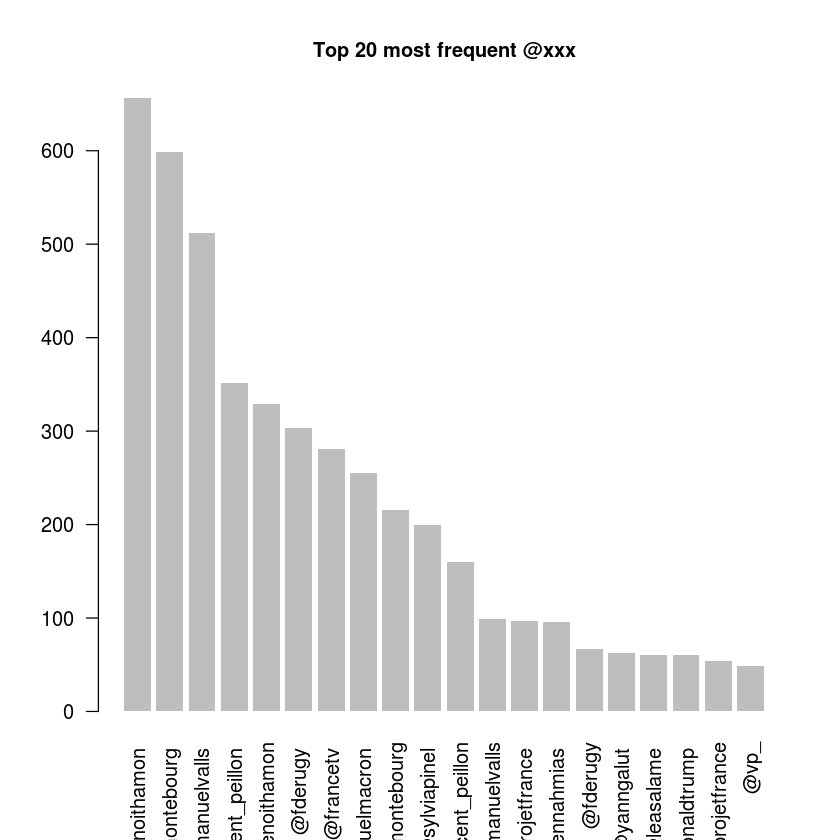

In [228]:

# barplot
barplot(top20, border=NA, las=2, main="Top 20 most frequent @xxx", cex.main=1)
